In [6]:
import numpy as np
import matplotlib.pyplot as plt
X=np.linspace(-3,3,1000)
print(X)
X+=np.random.normal(scale=0.05,size=1000)
Y=np.log(np.abs((X**2)-1)+0.5)
print(Y)

[-3.         -2.99399399 -2.98798799 -2.98198198 -2.97597598 -2.96996997
 -2.96396396 -2.95795796 -2.95195195 -2.94594595 -2.93993994 -2.93393393
 -2.92792793 -2.92192192 -2.91591592 -2.90990991 -2.9039039  -2.8978979
 -2.89189189 -2.88588589 -2.87987988 -2.87387387 -2.86786787 -2.86186186
 -2.85585586 -2.84984985 -2.84384384 -2.83783784 -2.83183183 -2.82582583
 -2.81981982 -2.81381381 -2.80780781 -2.8018018  -2.7957958  -2.78978979
 -2.78378378 -2.77777778 -2.77177177 -2.76576577 -2.75975976 -2.75375375
 -2.74774775 -2.74174174 -2.73573574 -2.72972973 -2.72372372 -2.71771772
 -2.71171171 -2.70570571 -2.6996997  -2.69369369 -2.68768769 -2.68168168
 -2.67567568 -2.66966967 -2.66366366 -2.65765766 -2.65165165 -2.64564565
 -2.63963964 -2.63363363 -2.62762763 -2.62162162 -2.61561562 -2.60960961
 -2.6036036  -2.5975976  -2.59159159 -2.58558559 -2.57957958 -2.57357357
 -2.56756757 -2.56156156 -2.55555556 -2.54954955 -2.54354354 -2.53753754
 -2.53153153 -2.52552553 -2.51951952 -2.51351351 -2.

In [7]:
np.linspace(2.0, 3.0, num=5)

array([2.  , 2.25, 2.5 , 2.75, 3.  ])

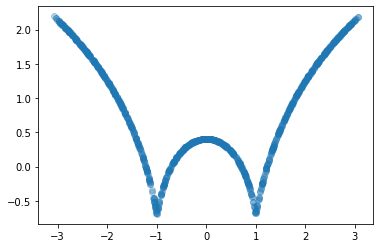

In [8]:
plt.scatter(X,Y,alpha=0.32)

In [9]:
def local_regression(x0,X,Y,tau):
    x0=np.r_[1,x0]
    X=np.c_[np.ones(len(X)),X]
    xw=X.T *radial_kernel(x0,X,tau)
    print(xw)
    beta=np.linalg.pinv(xw@X)@xw@Y
    return x0@beta

In [10]:
def radial_kernel(x0, X, tau):
    return np.exp(np.sum((X - x0) ** 2, axis=1) / (-2 * tau * tau))

[[ 6.90718251e-04  9.99891483e-01  6.40042504e-02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-2.09850686e-03 -2.99982176e+00 -1.90512044e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[[ 4.36506532e-08  1.29629829e-01  9.44475756e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.32617308e-07 -3.88908584e-01 -2.81128216e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[[ 4.91884667e-14  2.99667571e-04  2.48516676e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.49442026e-13 -8.99046862e-04 -7.39723060e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[[ 9.88367700e-22  1.23525685e-08  1.16601189e-03 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-3.00281105e-21 -3.70595253e-08 -3.47069620e-03 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[[ 3.54124950e-31  9.07940762e-15  9.75513183e-08 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.07588533e-30 -2.72395605e-14 -2.90366670e-07 .

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

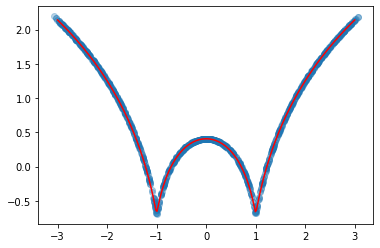

In [11]:
def plot_lwr(tau):
    domain=np.linspace(-3,3,num=300)
    prediction=[local_regression(x0,X,Y,tau) for x0 in domain]
    plt.scatter(X,Y,alpha=0.3)
    plt.plot(domain,prediction,color="red")
    return plt
plot_lwr(0.01)